In [32]:
from dolfin import *

# Define mesh

In [111]:
N = 10
#mesh = UnitIntervalMesh(N)
mesh = UnitSquareMesh(N,N)

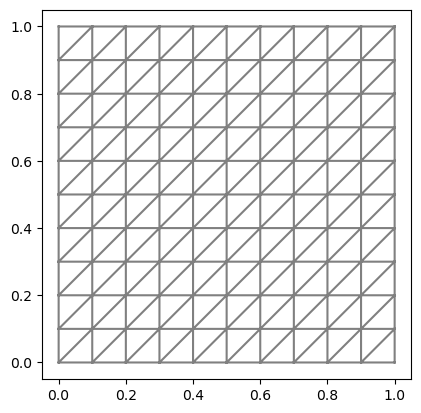

In [112]:
plot(mesh)

# Label subdomains and Interface

In [113]:
class Fluid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] <= 0.5

class Solid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] >= 0.5

class Interface(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] == 0.5

fluid = Fluid()
solid = Solid()
interface = Interface()

sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim())
sub_domains.set_all(0)
fluid.mark(sub_domains, 1)
solid.mark(sub_domains, 2)

boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
interface.mark(boundaries, 1)

In [114]:
sub_domains.array()
boundaries.array()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Define Function Spaces and Weak Variational Form

In [181]:
VE = FiniteElement("CG", mesh.ufl_cell(), 1)
V = FunctionSpace(mesh, MixedElement(VE, VE))
F = FunctionSpace(mesh, VE)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [182]:
v = TrialFunction(V)
psi = TestFunction(V)
(w, z) = split(v)
(psiw, psiz) = split(psi)

Define a function $f$ that we want to approximate

In [207]:
fe = Expression("x[0]*x[1]", degree = 1)
f = project(fe, F)

In [208]:
dx = Measure('dx', domain=mesh, subdomain_data=sub_domains)
dS = Measure('dS', domain=mesh, subdomain_data=boundaries)
n = FacetNormal(mesh)

In [209]:
assemble( inner(n("-"), n("+"))*dS(1))

-1.0

In [244]:
alpha = 1e-9

In [245]:
a = inner(grad(w), grad(psiz))*dx(1) - inner(z, psiz)*dx(1) \
+ alpha * inner(grad(z), grad(psiw))*dx(1) + inner(w, psiw)*dx(2) + alpha * inner(grad(z), grad(psiz))*dx(2) \
+ alpha * (- inner(grad(z)("-"), psiw("-")* n("-"))*dS(1) - inner(grad(z)("+"), psiz("+")* n("+"))*dS(1))

In [246]:
L = inner(f, psiw)*dx(2)

In [247]:
v2 = Function(V)

In [248]:
solve(a == L, v2, [])

Solving linear variational problem.


In [249]:
(w2, z2) = split(v2)

Object cannot be plotted directly, projecting to piecewise linears.


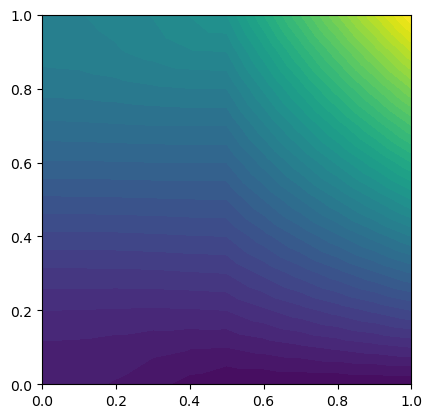

In [250]:
plot(w2)

In [251]:
w3, z3 = v2.split(deepcopy=True)

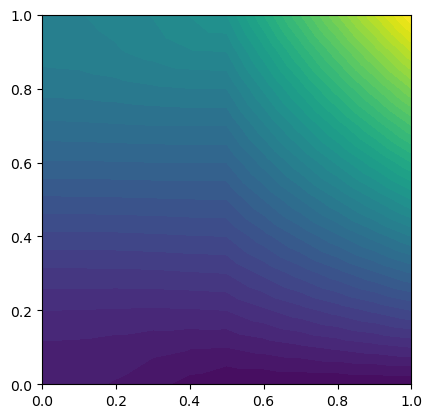

In [252]:
plot(w3)

In [253]:
w3.vector()[:]

array([ 4.19115370e-01,  4.10559678e-01,  4.23415300e-01,  3.84039419e-01,
        4.13530832e-01,  4.33971865e-01,  3.44526664e-01,  3.85694943e-01,
        4.21899214e-01,  4.51542078e-01,  2.96847387e-01,  3.45278445e-01,
        3.90372278e-01,  4.34456416e-01,  4.76172551e-01,  2.45014479e-01,
        2.97173237e-01,  3.47499708e-01,  3.96100191e-01,  4.47607943e-01,
        4.99967341e-01,  1.92465531e-01,  2.45216758e-01,  2.98361826e-01,
        3.49784452e-01,  3.99633494e-01,  4.50012303e-01,  6.00002007e-01,
        1.42718792e-01,  1.92582096e-01,  2.46256429e-01,  2.99601474e-01,
        3.50559847e-01,  3.99997373e-01,  5.39997839e-01,  7.00000332e-01,
        1.00058153e-01,  1.42523970e-01,  1.93593707e-01,  2.47781696e-01,
        3.00074192e-01,  3.50000593e-01,  4.80000718e-01,  6.30000230e-01,
        7.99999864e-01,  6.98087450e-02,  9.91658697e-02,  1.42831771e-01,
        1.95601676e-01,  2.49240389e-01,  2.99999987e-01,  4.19999791e-01,
        5.59999866e-01,  